Book 1  
Chapter 15 Basic Computations in NumPy
### `NumPy` 常见运算

In [3]:
# 导入包
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib import cm
import os

if not os.path.isdir('Figures'):
    os.makedirs('Figures')

### 自定义可视化函数

In [5]:
# 定义二维数组可视化函数
def visualize_2D(array, title, vmax, vmin):
    fig_width  = math.ceil(array.shape[1] * 0.5) # 用数组的列数计算图像宽度
    fig_height = math.ceil(array.shape[0] * 0.5) # 用数组的行数计算图像高度

    fig, ax = plt.subplots(figsize=(fig_width, fig_height))
    # 注意，seaborn.heatmap() 目前只能接受2D数组
    # 本书中，一维数组可视化时用圆圈
    # 可视化时，只有二维、三维数组用方块

    sns.heatmap(array,
                vmax=vmax,
                vmin=vmin,
                annot=True,        # 增加注释
                fmt='.2f',         # 注释数值的格式
                square=True,       # 热图方格为正方形
                cmap='RdYlBu_r',   # 指定色谱
                linewidths=.5,     # 方格线宽
                cbar=False,        # 不显示色谱条
                yticklabels=False, # 不显示纵轴标签
                xticklabels=False, # 不显示横轴标签
                ax=ax)             # 指定绘制热图的轴

    fig.savefig('Figures/'+title+'.svg', format='svg')

In [6]:
# 定义绘制一元数组可视化函数
def visualize_1D(array, title, vmax, vmin):
    fig, ax = plt.subplots()

    cmap = plt.colormaps.get_cmap('RdYlBu')
    array_norm = (array - vmin) / (vmax - vmin)
    colors = cmap(array_norm)

    for idx in range(len(array)):
        circle_idx = plt.Circle((idx, 0), radius=0.5, facecolor=colors[idx], edgecolor='w')
        # 在指定坐标 (idx, 0)，绘制半径为 0.5 的圆形
        ax.add_patch(circle_idx)
        # 在轴对象上添加圆形，这一步不可以省去，不然无法显示圆形对象
        ax.text(idx, 0, s='{:.1f}'.format(array[idx]),
                horizontalalignment='center',
                verticalalignment='center')

    ax.set_xlim(-0.6, 0.6+len(array))
    ax.set_ylim(-0.6, 0.6)
    ax.set_aspect('equal', adjustable='box')
    ax.axis('off')

    fig.savefig('Figures/'+title+'.svg', format='svg')

### 加减乘除乘幂

#### 一维

##### 定义数组

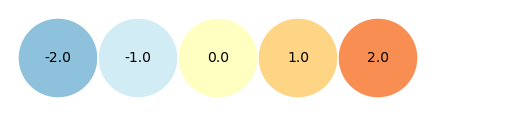

In [10]:
a_1D = np.arange(-2, 2+1)
visualize_1D(a_1D, '一维数组', -4, 4)

In [11]:
all_twos = 2 * np.ones_like(a_1D)
all_twos

array([2, 2, 2, 2, 2])

In [12]:
np.full_like(a_1D, 2)

array([2, 2, 2, 2, 2])

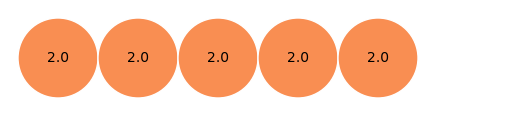

In [13]:
visualize_1D(all_twos, '一维数组，全2', -4, 4)

##### 加法

In [15]:
a_1D + all_twos

array([0, 1, 2, 3, 4])

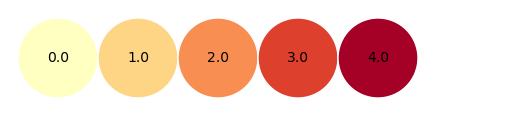

In [16]:
visualize_1D(a_1D + all_twos, '一维数组，加法', -4, 4)

In [17]:
np.add(a_1D, all_twos)

array([0, 1, 2, 3, 4])

##### 减法

In [19]:
a_1D - all_twos

array([-4, -3, -2, -1,  0])

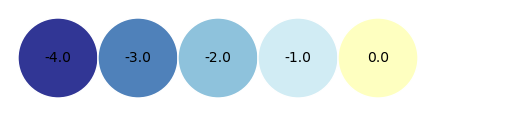

In [20]:
visualize_1D(a_1D - all_twos, '一维数组，减法', -4, 4)

In [21]:
np.subtract(a_1D, all_twos)

array([-4, -3, -2, -1,  0])

##### 乘法

In [23]:
a_1D * all_twos

array([-4, -2,  0,  2,  4])

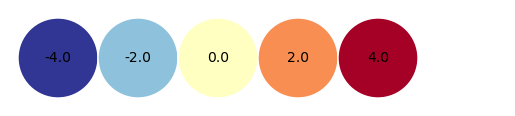

In [24]:
visualize_1D(a_1D * all_twos, '一维数组，乘法', -4, 4)

In [25]:
np.multiply(a_1D, all_twos)

array([-4, -2,  0,  2,  4])

##### 除法

In [27]:
a_1D / all_twos

array([-1. , -0.5,  0. ,  0.5,  1. ])

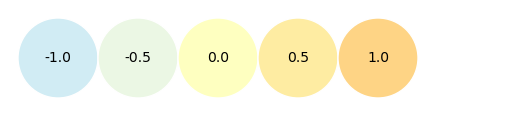

In [28]:
visualize_1D(a_1D / all_twos, '一维数组，除法', -4, 4)

In [29]:
np.divide(a_1D, all_twos)

array([-1. , -0.5,  0. ,  0.5,  1. ])

##### 乘幂

In [31]:
a_1D ** all_twos

array([4, 1, 0, 1, 4])

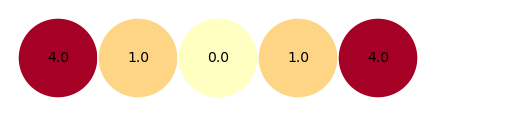

In [32]:
visualize_1D(a_1D ** all_twos, '一维数组，乘幂', -4, 4)

In [33]:
np.power(a_1D, all_twos)

array([4, 1, 0, 1, 4])

#### 二维

In [35]:
a_2D = np.random.uniform(-1, 1, (4, 6))
a_2D

array([[-0.00767782, -0.36036189,  0.32167025,  0.57096909,  0.94225645,
         0.32624989],
       [-0.38972909, -0.03388397, -0.07478693, -0.06121448,  0.55079004,
         0.76267044],
       [-0.05981882,  0.03978438,  0.11286287,  0.68345686,  0.86256176,
         0.08974961],
       [-0.68879121,  0.65810836,  0.19839981, -0.35540399,  0.92710539,
         0.86212878]])

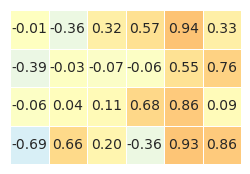

In [36]:
visualize_2D(a_2D, '二维数组', 3, -3)

In [37]:
all_twos_2D = np.full_like(a_2D, 2)
all_twos_2D

array([[2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2.]])

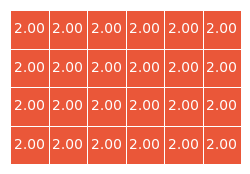

In [38]:
visualize_2D(all_twos_2D, '二维数组，全2', 3, -3)

##### 加法

In [40]:
a_2D + all_twos_2D

array([[1.99232218, 1.63963811, 2.32167025, 2.57096909, 2.94225645,
        2.32624989],
       [1.61027091, 1.96611603, 1.92521307, 1.93878552, 2.55079004,
        2.76267044],
       [1.94018118, 2.03978438, 2.11286287, 2.68345686, 2.86256176,
        2.08974961],
       [1.31120879, 2.65810836, 2.19839981, 1.64459601, 2.92710539,
        2.86212878]])

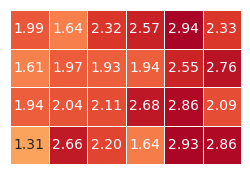

In [41]:
visualize_2D(a_2D + all_twos_2D, '二维数组，加法', 3, -3)

##### 减法

In [43]:
a_2D - all_twos_2D

array([[-2.00767782, -2.36036189, -1.67832975, -1.42903091, -1.05774355,
        -1.67375011],
       [-2.38972909, -2.03388397, -2.07478693, -2.06121448, -1.44920996,
        -1.23732956],
       [-2.05981882, -1.96021562, -1.88713713, -1.31654314, -1.13743824,
        -1.91025039],
       [-2.68879121, -1.34189164, -1.80160019, -2.35540399, -1.07289461,
        -1.13787122]])

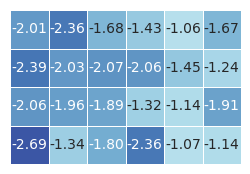

In [44]:
visualize_2D(a_2D - all_twos_2D, '二维数组，减法', 3, -3)

##### 乘法

In [46]:
a_2D * all_twos_2D

array([[-0.01535565, -0.72072379,  0.6433405 ,  1.14193819,  1.88451291,
         0.65249978],
       [-0.77945818, -0.06776793, -0.14957386, -0.12242896,  1.10158009,
         1.52534087],
       [-0.11963764,  0.07956877,  0.22572574,  1.36691372,  1.72512351,
         0.17949921],
       [-1.37758242,  1.31621673,  0.39679962, -0.71080798,  1.85421078,
         1.72425757]])

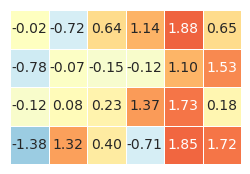

In [47]:
visualize_2D(a_2D * all_twos_2D, '二维数组，乘法', 3, -3)

##### 除法

In [49]:
a_2D / all_twos_2D

array([[-0.00383891, -0.18018095,  0.16083513,  0.28548455,  0.47112823,
         0.16312495],
       [-0.19486454, -0.01694198, -0.03739347, -0.03060724,  0.27539502,
         0.38133522],
       [-0.02990941,  0.01989219,  0.05643143,  0.34172843,  0.43128088,
         0.0448748 ],
       [-0.3443956 ,  0.32905418,  0.0991999 , -0.177702  ,  0.4635527 ,
         0.43106439]])

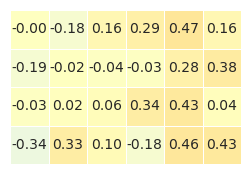

In [50]:
visualize_2D(a_2D / all_twos_2D, '二维数组，除法', 3, -3)

##### 乘幂

In [52]:
a_2D ** all_twos_2D

array([[5.89489894e-05, 1.29860694e-01, 1.03471751e-01, 3.26005707e-01,
        8.87847222e-01, 1.06438992e-01],
       [1.51888763e-01, 1.14812320e-03, 5.59308503e-03, 3.74721259e-03,
        3.03369672e-01, 5.81666195e-01],
       [3.57829111e-03, 1.58279716e-03, 1.27380274e-02, 4.67113277e-01,
        7.44012785e-01, 8.05499177e-03],
       [4.74433329e-01, 4.33106620e-01, 3.93624840e-02, 1.26311998e-01,
        8.59524407e-01, 7.43266041e-01]])

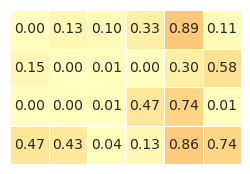

In [53]:
visualize_2D(a_2D ** all_twos_2D, '二维数组，乘幂', 3, -3)

### 广播原则

#### 一维、标量

In [56]:
a_1D + 2

array([0, 1, 2, 3, 4])

In [57]:
a_1D - 2

array([-4, -3, -2, -1,  0])

In [58]:
a_1D * 2

array([-4, -2,  0,  2,  4])

In [59]:
a_1D / 2

array([-1. , -0.5,  0. ,  0.5,  1. ])

In [60]:
a_1D ** 2

array([4, 1, 0, 1, 4])

In [61]:
a_1D % 2

array([0, 1, 0, 1, 0])

#### 一维、列向量

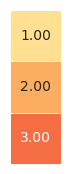

In [63]:
visualize_2D(np.array([[1], [2], [3]]), '列向量，二维', 5, -5)

In [64]:
a_1D + np.array([[1], [2], [3]])

array([[-1,  0,  1,  2,  3],
       [ 0,  1,  2,  3,  4],
       [ 1,  2,  3,  4,  5]])

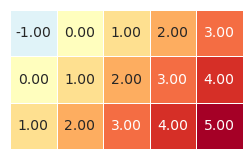

In [65]:
visualize_2D(a_1D + np.array([[1], [2], [3]]), '一维数组、列向量，加法', 5, -5)

In [66]:
a_1D * np.array([[1], [2], [3]])

array([[-2, -1,  0,  1,  2],
       [-4, -2,  0,  2,  4],
       [-6, -3,  0,  3,  6]])

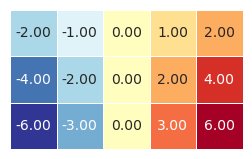

In [67]:
visualize_2D(a_1D * np.array([[1], [2], [3]]), '一维数组、列向量，乘法', 5, -5)

In [68]:
a_1D ** np.array([[1], [2], [3]])

array([[-2, -1,  0,  1,  2],
       [ 4,  1,  0,  1,  4],
       [-8, -1,  0,  1,  8]])

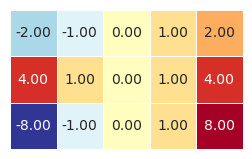

In [69]:
visualize_2D(a_1D ** np.array([[1], [2], [3]]), '一维数组、列向量，乘幂', 5, -5)

#### 二维、标量

##### 加法

In [72]:
a_2D + 2

array([[1.99232218, 1.63963811, 2.32167025, 2.57096909, 2.94225645,
        2.32624989],
       [1.61027091, 1.96611603, 1.92521307, 1.93878552, 2.55079004,
        2.76267044],
       [1.94018118, 2.03978438, 2.11286287, 2.68345686, 2.86256176,
        2.08974961],
       [1.31120879, 2.65810836, 2.19839981, 1.64459601, 2.92710539,
        2.86212878]])

#### 二维、一维

In [74]:
np.linspace(-1, 1, 6)

array([-1. , -0.6, -0.2,  0.2,  0.6,  1. ])

In [75]:
np.broadcast_to(np.linspace(-1, 1, 6), (4, 6))

array([[-1. , -0.6, -0.2,  0.2,  0.6,  1. ],
       [-1. , -0.6, -0.2,  0.2,  0.6,  1. ],
       [-1. , -0.6, -0.2,  0.2,  0.6,  1. ],
       [-1. , -0.6, -0.2,  0.2,  0.6,  1. ]])

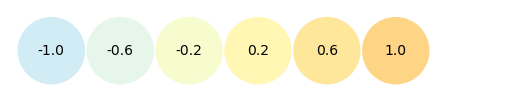

In [76]:
visualize_1D(np.linspace(-1, 1, 6), '一维数组，6个元素', -4, 4)

In [77]:
a_2D + np.linspace(-1, 1, 6)

array([[-1.00767782e+00, -9.60361893e-01,  1.21670252e-01,
         7.70969094e-01,  1.54225645e+00,  1.32624989e+00],
       [-1.38972909e+00, -6.33883967e-01, -2.74786931e-01,
         1.38785520e-01,  1.15079004e+00,  1.76267044e+00],
       [-1.05981882e+00, -5.60215617e-01, -8.71371300e-02,
         8.83456858e-01,  1.46256176e+00,  1.08974961e+00],
       [-1.68879121e+00,  5.81083647e-02, -1.60019147e-03,
        -1.55403992e-01,  1.52710539e+00,  1.86212878e+00]])

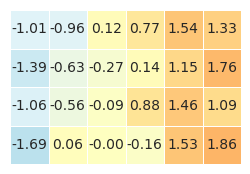

In [78]:
visualize_2D(a_2D + np.linspace(-1, 1, 6), '二维数组、一维数组，加法', 5, -5)

In [79]:
# 行向量
np.linspace(-1, 1, 6).reshape(1, -1)

array([[-1. , -0.6, -0.2,  0.2,  0.6,  1. ]])

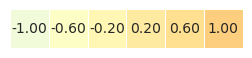

In [80]:
visualize_2D(np.linspace(-1, 1, 6).reshape(1, -1), '行向量，6个元素', 5, -6)

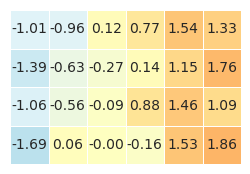

In [81]:
visualize_2D(a_2D + np.linspace(-1, 1, 6).reshape(1, -1), '二维数组、行向量，加法', 5, -5)

In [82]:
a_2D * np.linspace(-1, 1, 6)

array([[ 0.00767782,  0.21621714, -0.06433405,  0.11419382,  0.56535387,
         0.32624989],
       [ 0.38972909,  0.02033038,  0.01495739, -0.0122429 ,  0.33047403,
         0.76267044],
       [ 0.05981882, -0.02387063, -0.02257257,  0.13669137,  0.51753705,
         0.08974961],
       [ 0.68879121, -0.39486502, -0.03967996, -0.0710808 ,  0.55626324,
         0.86212878]])

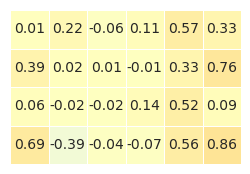

In [83]:
visualize_2D(a_2D * np.linspace(-1, 1, 6), '二维数组、一维数组，乘法', 5, -5)

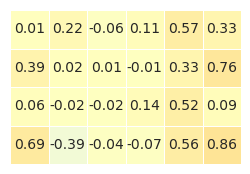

In [84]:
visualize_2D(a_2D * np.linspace(-1, 1, 6).reshape(1, -1), '二维数组、行向量，乘法', 5, -5)

In [85]:
a_2D + np.array([-2, -1, 0, 1]) # 报错

ValueError: operands could not be broadcast together with shapes (4,6) (4,) 

#### 二维、标量

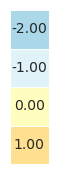

In [87]:
visualize_2D(np.array([[-2], [-1], [0], [1]]), '列向量，4个元素', 5, -5)

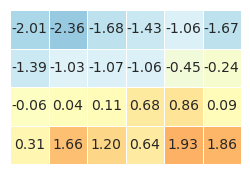

In [89]:
visualize_2D(a_2D + np.array([[-2], [-1], [0], [1]]), '二维数组、列向量，加法', 5, -5)

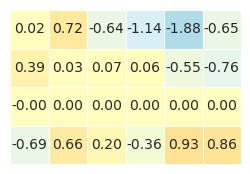

In [91]:
visualize_2D(a_2D * np.array([[-2], [-1], [0], [1]]), '二维数组、列向量，乘法', 5, -5)

#### 三维

In [94]:
A_3D = np.arange(-30, 30).reshape(3, 4, 5)
A_3D

array([[[-30, -29, -28, -27, -26],
        [-25, -24, -23, -22, -21],
        [-20, -19, -18, -17, -16],
        [-15, -14, -13, -12, -11]],

       [[-10,  -9,  -8,  -7,  -6],
        [ -5,  -4,  -3,  -2,  -1],
        [  0,   1,   2,   3,   4],
        [  5,   6,   7,   8,   9]],

       [[ 10,  11,  12,  13,  14],
        [ 15,  16,  17,  18,  19],
        [ 20,  21,  22,  23,  24],
        [ 25,  26,  27,  28,  29]]])

In [96]:
A_3D + 2

array([[[-28, -27, -26, -25, -24],
        [-23, -22, -21, -20, -19],
        [-18, -17, -16, -15, -14],
        [-13, -12, -11, -10,  -9]],

       [[ -8,  -7,  -6,  -5,  -4],
        [ -3,  -2,  -1,   0,   1],
        [  2,   3,   4,   5,   6],
        [  7,   8,   9,  10,  11]],

       [[ 12,  13,  14,  15,  16],
        [ 17,  18,  19,  20,  21],
        [ 22,  23,  24,  25,  26],
        [ 27,  28,  29,  30,  31]]])

In [98]:
A_3D + np.arange(1, 5+1)

array([[[-29, -27, -25, -23, -21],
        [-24, -22, -20, -18, -16],
        [-19, -17, -15, -13, -11],
        [-14, -12, -10,  -8,  -6]],

       [[ -9,  -7,  -5,  -3,  -1],
        [ -4,  -2,   0,   2,   4],
        [  1,   3,   5,   7,   9],
        [  6,   8,  10,  12,  14]],

       [[ 11,  13,  15,  17,  19],
        [ 16,  18,  20,  22,  24],
        [ 21,  23,  25,  27,  29],
        [ 26,  28,  30,  32,  34]]])

In [100]:
np.array([[[1, 2, 3, 4, 5]]])

array([[[1, 2, 3, 4, 5]]])

In [102]:
A_3D + np.array([[[1, 2, 3, 4, 5]]])

array([[[-29, -27, -25, -23, -21],
        [-24, -22, -20, -18, -16],
        [-19, -17, -15, -13, -11],
        [-14, -12, -10,  -8,  -6]],

       [[ -9,  -7,  -5,  -3,  -1],
        [ -4,  -2,   0,   2,   4],
        [  1,   3,   5,   7,   9],
        [  6,   8,  10,  12,  14]],

       [[ 11,  13,  15,  17,  19],
        [ 16,  18,  20,  22,  24],
        [ 21,  23,  25,  27,  29],
        [ 26,  28,  30,  32,  34]]])

In [104]:
np.array([[[1]], [[2]], [[3]]])

array([[[1]],

       [[2]],

       [[3]]])

In [106]:
A_3D + np.array([[[1]], [[2]], [[3]]])

array([[[-29, -28, -27, -26, -25],
        [-24, -23, -22, -21, -20],
        [-19, -18, -17, -16, -15],
        [-14, -13, -12, -11, -10]],

       [[ -8,  -7,  -6,  -5,  -4],
        [ -3,  -2,  -1,   0,   1],
        [  2,   3,   4,   5,   6],
        [  7,   8,   9,  10,  11]],

       [[ 13,  14,  15,  16,  17],
        [ 18,  19,  20,  21,  22],
        [ 23,  24,  25,  26,  27],
        [ 28,  29,  30,  31,  32]]])

In [108]:
np.array([[[1], [2], [3], [4]]])

array([[[1],
        [2],
        [3],
        [4]]])

In [110]:
A_3D + np.array([[[1],[2],[3],[4]]])

array([[[-29, -28, -27, -26, -25],
        [-23, -22, -21, -20, -19],
        [-17, -16, -15, -14, -13],
        [-11, -10,  -9,  -8,  -7]],

       [[ -9,  -8,  -7,  -6,  -5],
        [ -3,  -2,  -1,   0,   1],
        [  3,   4,   5,   6,   7],
        [  9,  10,  11,  12,  13]],

       [[ 11,  12,  13,  14,  15],
        [ 17,  18,  19,  20,  21],
        [ 23,  24,  25,  26,  27],
        [ 29,  30,  31,  32,  33]]])

### 统计函数

In [113]:
A_2D = np.random.randint(0, 10, size=(4, 6))
A_2D

array([[9, 7, 1, 6, 1, 8],
       [2, 8, 0, 7, 0, 9],
       [0, 4, 6, 9, 5, 2],
       [5, 1, 0, 3, 1, 8]])

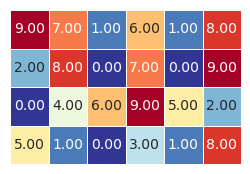

In [115]:
visualize_2D(A_2D, '二维数组 2', 9, 0)

In [117]:
from sklearn.datasets import load_iris

iris = load_iris()
iris_data_array = iris.data

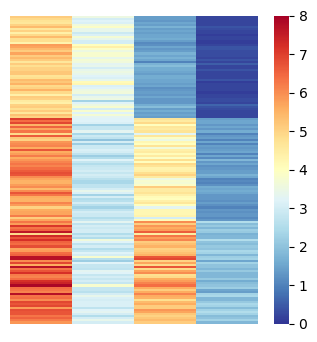

In [119]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(4, 4))

sns.heatmap(iris_data_array, # 鸢尾花数据数组
            cmap='RdYlBu_r', # 指定色谱
            ax=ax,           # 指定轴
            vmax=8,          # 色谱最大值
            vmin=0,          # 色谱最小值
            xticklabels=[],  # 不显示横轴标签
            yticklabels=[],  # 不显示纵轴标签
            cbar=True)       # 显示色谱条

fig.savefig('Figures/鸢尾花数据热图.svg', format='svg')

#### 最大值

In [122]:
A_2D.max()

9

In [124]:
A_2D.max(axis=0)

array([9, 8, 6, 9, 5, 9])

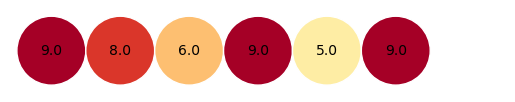

In [126]:
visualize_1D(A_2D.max(axis=0), '沿 axis=0，最大值', 0, 9)

In [128]:
A_2D.max(axis=1)

array([9, 9, 9, 8])

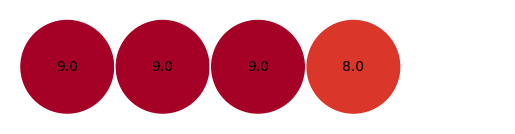

In [130]:
visualize_1D(A_2D.max(axis=1), '沿 axis=1，最大值', 0, 9)

In [132]:
A_2D.max(axis=1, keepdims=True)

array([[9],
       [9],
       [9],
       [8]])

In [134]:
iris_data_array.max() # 整个矩阵的最大值

7.9

In [136]:
iris_data_array.max(axis=0) # 每列最大值

array([7.9, 4.4, 6.9, 2.5])

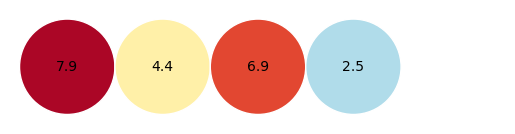

In [138]:
visualize_1D(iris_data_array.max(axis=0), '鸢尾花沿 axis=0，最大值', 0, 8)

In [140]:
np.argmax(iris_data_array, axis=0) # 每列最大值位置

array([131,  15, 118, 100])

In [142]:
iris_data_array.max(axis=1) # 每行最大值

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

In [144]:
np.argmax(iris_data_array, axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

#### 最小值

In [147]:
A_2D.min()

0

In [149]:
A_2D.min(axis=0)

array([0, 1, 0, 3, 0, 2])

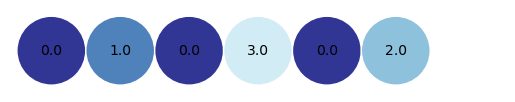

In [151]:
visualize_1D(A_2D.min(axis=0), '沿 axis=0，最小值', 0, 8)

In [153]:
A_2D.min(axis=1)

array([1, 0, 0, 0])

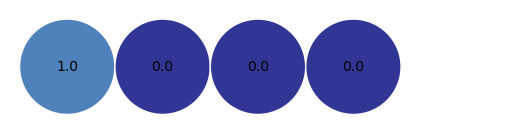

In [155]:
visualize_1D(A_2D.min(axis=1), '沿 axis=1，最小值', 0, 8)

In [157]:
iris_data_array.min()

0.1

In [159]:
iris_data_array.min(axis=0)

array([4.3, 2. , 1. , 0.1])

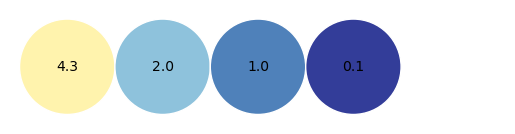

In [161]:
visualize_1D(iris_data_array.min(axis=0), '鸢尾花沿 axis=0，最小值', 0, 8)

In [163]:
np.argmin(iris_data_array, axis=0)

array([13, 60, 22,  9])

In [165]:
iris_data_array.min(axis=1)

array([0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1,
       0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2,
       0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.2, 0.2, 0.2, 0.1, 0.2,
       0.2, 0.3, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2, 1.4, 1.5,
       1.5, 1.3, 1.5, 1.3, 1.6, 1. , 1.3, 1.4, 1. , 1.5, 1. , 1.4, 1.3,
       1.4, 1.5, 1. , 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4, 1.4, 1.7,
       1.5, 1. , 1.1, 1. , 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3, 1.3, 1.2,
       1.4, 1.2, 1. , 1.3, 1.2, 1.3, 1.3, 1.1, 1.3, 2.5, 1.9, 2.1, 1.8,
       2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 2. , 1.9, 2.1, 2. , 2.4, 2.3, 1.8,
       2.2, 2.3, 1.5, 2.3, 2. , 2. , 1.8, 2.1, 1.8, 1.8, 1.8, 2.1, 1.6,
       1.9, 2. , 2.2, 1.5, 1.4, 2.3, 2.4, 1.8, 1.8, 2.1, 2.4, 2.3, 1.9,
       2.3, 2.5, 2.3, 1.9, 2. , 2.3, 1.8])

#### 求和

In [168]:
iris_data_array.sum()

2078.7

In [170]:
iris_data_array.sum(axis=0)

array([876.5, 458.6, 563.7, 179.9])

In [172]:
iris_data_array.sum(axis=1)

array([10.2,  9.5,  9.4,  9.4, 10.2, 11.4,  9.7, 10.1,  8.9,  9.6, 10.8,
       10. ,  9.3,  8.5, 11.2, 12. , 11. , 10.3, 11.5, 10.7, 10.7, 10.7,
        9.4, 10.6, 10.3,  9.8, 10.4, 10.4, 10.2,  9.7,  9.7, 10.7, 10.9,
       11.3,  9.7,  9.6, 10.5, 10. ,  8.9, 10.2, 10.1,  8.4,  9.1, 10.7,
       11.2,  9.5, 10.7,  9.4, 10.7,  9.9, 16.3, 15.6, 16.4, 13.1, 15.4,
       14.3, 15.9, 11.6, 15.4, 13.2, 11.5, 14.6, 13.2, 15.1, 13.4, 15.6,
       14.6, 13.6, 14.4, 13.1, 15.7, 14.2, 15.2, 14.8, 14.9, 15.4, 15.8,
       16.4, 14.9, 12.8, 12.8, 12.6, 13.6, 15.4, 14.4, 15.5, 16. , 14.3,
       14. , 13.3, 13.7, 15.1, 13.6, 11.6, 13.8, 14.1, 14.1, 14.7, 11.7,
       13.9, 18.1, 15.5, 18.1, 16.6, 17.5, 19.3, 13.6, 18.3, 16.8, 19.4,
       16.8, 16.3, 17.4, 15.2, 16.1, 17.2, 16.8, 20.4, 19.5, 14.7, 18.1,
       15.3, 19.2, 15.7, 17.8, 18.2, 15.6, 15.8, 16.9, 17.6, 18.2, 20.1,
       17. , 15.7, 15.7, 19.1, 17.7, 16.8, 15.6, 17.5, 17.8, 17.4, 15.5,
       18.2, 18.2, 17.2, 15.7, 16.7, 17.3, 15.8])

#### 平均值

$${\displaystyle \mu = {\frac{1}{n}} \sum_{i=1}^{n}x_{i}}$$

In [175]:
np.average(iris_data_array)

3.4644999999999997

In [177]:
np.average(iris_data_array, axis=0) # 每列均值

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

In [179]:
np.average(iris_data_array, axis=1)

array([2.55 , 2.375, 2.35 , 2.35 , 2.55 , 2.85 , 2.425, 2.525, 2.225,
       2.4  , 2.7  , 2.5  , 2.325, 2.125, 2.8  , 3.   , 2.75 , 2.575,
       2.875, 2.675, 2.675, 2.675, 2.35 , 2.65 , 2.575, 2.45 , 2.6  ,
       2.6  , 2.55 , 2.425, 2.425, 2.675, 2.725, 2.825, 2.425, 2.4  ,
       2.625, 2.5  , 2.225, 2.55 , 2.525, 2.1  , 2.275, 2.675, 2.8  ,
       2.375, 2.675, 2.35 , 2.675, 2.475, 4.075, 3.9  , 4.1  , 3.275,
       3.85 , 3.575, 3.975, 2.9  , 3.85 , 3.3  , 2.875, 3.65 , 3.3  ,
       3.775, 3.35 , 3.9  , 3.65 , 3.4  , 3.6  , 3.275, 3.925, 3.55 ,
       3.8  , 3.7  , 3.725, 3.85 , 3.95 , 4.1  , 3.725, 3.2  , 3.2  ,
       3.15 , 3.4  , 3.85 , 3.6  , 3.875, 4.   , 3.575, 3.5  , 3.325,
       3.425, 3.775, 3.4  , 2.9  , 3.45 , 3.525, 3.525, 3.675, 2.925,
       3.475, 4.525, 3.875, 4.525, 4.15 , 4.375, 4.825, 3.4  , 4.575,
       4.2  , 4.85 , 4.2  , 4.075, 4.35 , 3.8  , 4.025, 4.3  , 4.2  ,
       5.1  , 4.875, 3.675, 4.525, 3.825, 4.8  , 3.925, 4.45 , 4.55 ,
       3.9  , 3.95 ,

#### 方差

$${\displaystyle \operatorname {Var}(X) = {\frac{1}{n - 1}} \sum_{i=1}^{n}(x_{i} - \mu)^{2}}$$

`NumPy` 默认计算:
$${\displaystyle \operatorname {Var}(X) = {\frac{1}{n}} \sum_{i=1}^{n}(x_{i} - \mu)^{2}}$$

In [182]:
np.var(iris_data_array) # 注意，NumPy 中默认分母为 n

3.896056416666667

In [184]:
np.var(iris_data_array, axis=0)

array([0.68112222, 0.18871289, 3.09550267, 0.57713289])

In [186]:
np.var(iris_data_array, axis=0, ddof=1) # 将分母设为 n - 1

array([0.68569351, 0.18997942, 3.11627785, 0.58100626])

#### 标准差

In [189]:
np.std(iris_data_array, axis=0) # 注意，NumPy 中默认分母为 n

array([0.82530129, 0.43441097, 1.75940407, 0.75969263])

#### 协方差矩阵

In [192]:
SIGMA = np.cov(iris_data_array.T, ddof=1) # 注意转置
SIGMA

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

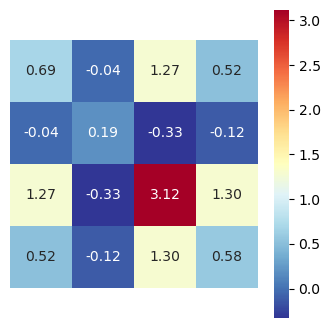

In [194]:
# 可视化协方差矩阵
fig, ax = plt.subplots(figsize=(4, 4))

sns.heatmap(SIGMA,
            cmap='RdYlBu_r', # 指定色谱
            ax=ax,           # 指定轴
            annot=True,      # 注释
            fmt='.2f',       # 注释数值的格式
            square=True,     # 热图方格为正方形
            xticklabels=[],  # 不显示横轴标签
            yticklabels=[],  # 不显示纵轴标签
            cbar=True)       # 显示色谱条

fig.savefig('Figures/鸢尾花数据协方差矩阵.svg', format='svg')

#### 相关性系数矩阵

In [197]:
CORR = np.corrcoef(iris_data_array.T)
CORR

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

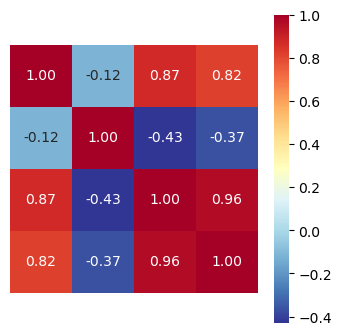

In [199]:
fig, ax = plt.subplots(figsize=(4, 4))

sns.heatmap(CORR,
            cmap='RdYlBu_r', # 指定色谱
            ax=ax,           # 指定轴
            annot=True,      # 注释
            fmt='.2f',       # 注释数值的格式
            square=True,     # 热图方格为正方形
            xticklabels=[],  # 不显示横轴标签
            yticklabels=[],  # 不显示纵轴标签
            cbar=True)       # 显示色谱条

fig.savefig('Figures/鸢尾花数据相关性系数矩阵.svg', format='svg')

请大家自行学习如下函数：  
`numpy.percentile()`  
`numpy.quantile()`  
`numpy.median()`   
`numpy.nanmean()`  
`numpy.nanmedian()`  
`numpy.nanstd()`  
`numpy.nanvar()`

### 数学函数

`NumPy` 有大量数学函数，这个笔记我们仅仅选取几个常用的数学函数，并可视化函数图形。

#### 自定义可视化函数

In [204]:
def visualize_fx(x_array, f_array, title, step=False):
    fig, ax = plt.subplots(figsize=(3, 3))

    ax.plot([-5, 5], [-5, 5], c='r', ls='--', lw=0.5)

    if step:
        ax.step(x_array, f_array) # Step plot
    else:
        ax.plot(x_array, f_array)

    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.axvline(0, c='k')
    ax.axhline(0, c='k')
    ax.set_xticks(np.arange(-5, 5+1))
    ax.set_yticks(np.arange(-5, 5+1))
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    plt.grid(True)
    ax.set_aspect('equal', adjustable='box')

    fig.savefig('Figures/'+title+'.svg', format='svg')

In [206]:
# 常用常数
print(np.pi)
print(np.e)
print(np.Inf)
print(np.NAN)

3.141592653589793
2.718281828459045
inf
nan


##### 幂函数 Power function

$$f(x) = x^p$$

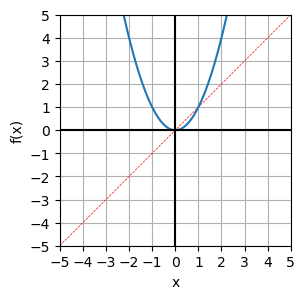

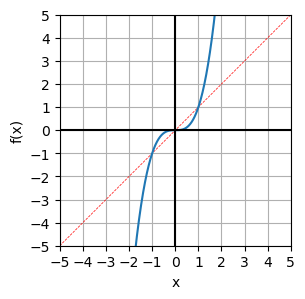

In [209]:
# 幂函数，p = 2
x_array = np.linspace(-5, 5, 1001)
f_array = np.power(x_array, 2)
visualize_fx(x_array, f_array, '幂函数_p=2')

# 幂函数，p = 3
f_array = np.power(x_array, 3)
visualize_fx(x_array, f_array, '幂函数_p=3')

##### 正弦函数 Sine function

$$f(x) = \text{sin}(x)$$

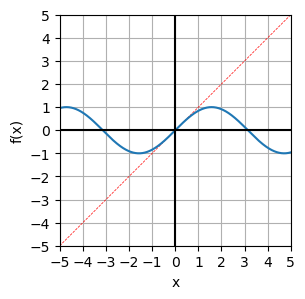

In [212]:
# 正弦函数
x_array = np.linspace(-5, 5, 1001)
f_array = np.sin(x_array)
visualize_fx(x_array, f_array, '正弦函数')

##### 反正弦函数 Inverse sine function

$$f(x) = \text{arcsin}(x)$$

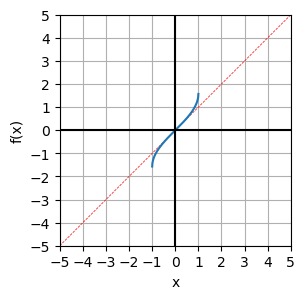

In [215]:
# 反正弦函数
x_array = np.linspace(-5, 5, 1001)
x_array_ = np.copy(x_array)
x_array_[(x_array_<-1) | (x_array_>1)] = np.nan
f_array = np.arcsin(x_array_)
visualize_fx(x_array_, f_array, '反正弦函数')

##### 余弦函数 Cosine function

$$f(x) = \text{cos}(x)$$

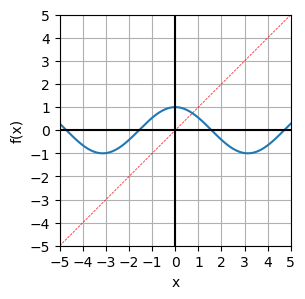

In [218]:
# 余弦函数
x_array = np.linspace(-5, 5, 1001)
f_array = np.cos(x_array)
visualize_fx(x_array, f_array, '余弦函数')

##### 反余弦函数 Inverse cosine function

$$f(x) = \text{arccos}(x)$$

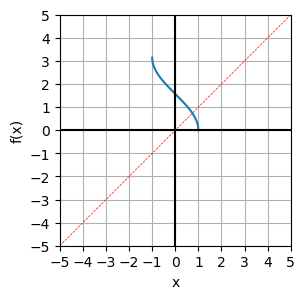

In [221]:
# 反余弦函数
x_array = np.linspace(-5, 5, 1001)
x_array_ = np.copy(x_array)
x_array_[(x_array_<-1) | (x_array_>1)] = np.nan
f_array = np.arccos(x_array_)
visualize_fx(x_array_, f_array, '反余弦函数')

##### 正切函数 Tangent function

$$f(x) = \text{tan}(x)$$

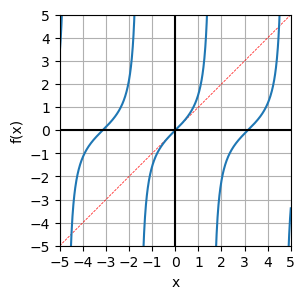

In [224]:
# 正切函数
x_array = np.linspace(-5, 5, 1001)
f_array = np.tan(x_array)
f_array[:-1][np.diff(f_array)<0] = np.nan
visualize_fx(x_array, f_array, '正切函数')

##### 反正切函数 Inverse tangent function

$$f(x) = \text{arctan}(x)$$

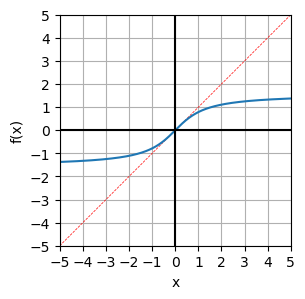

In [227]:
# 反正切函数
x_array = np.linspace(-5, 5, 1001)
f_array = np.arctan(x_array)
visualize_fx(x_array, f_array, '反正切函数')

##### 双曲正弦函数 Hyperbolic sine function

$$f(x) = \text{sinh}(x)$$

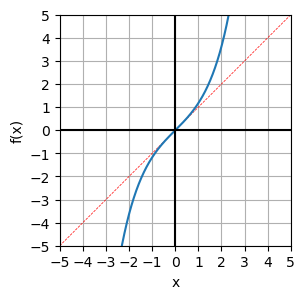

In [230]:
# 双曲正弦函数
x_array = np.linspace(-5, 5, 1001)
f_array = np.sinh(x_array)
visualize_fx(x_array, f_array, '双曲正弦函数')

##### 双曲余弦函数 Hyperbolic cosine function

$$f(x) = \text{cosh}(x)$$

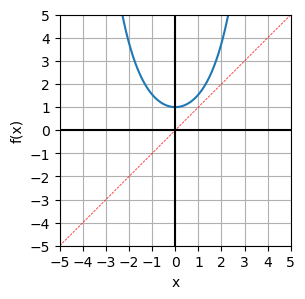

In [233]:
# 双曲余弦函数
x_array = np.linspace(-5, 5, 1001)
f_array = np.cosh(x_array)
visualize_fx(x_array, f_array, '双曲余弦函数')

##### 双曲正切函数 Hyperbolic tangent function

$$f(x) = \text{tanh}(x)$$

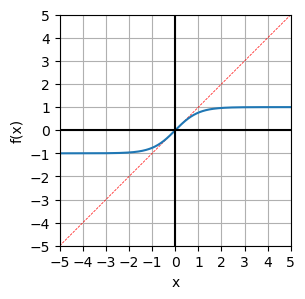

In [236]:
# 双曲正切函数
x_array = np.linspace(-5, 5, 1001)
f_array = np.tanh(x_array)
visualize_fx(x_array, f_array, '双曲正切函数')

##### 绝对值函数 Absolute function

$$f(x) = |x|$$

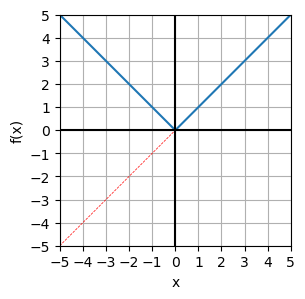

In [239]:
# 绝对值函数
x_array = np.linspace(-5, 5, 1001)
f_array = np.abs(x_array)
visualize_fx(x_array, f_array, '绝对值函数')

##### 向下取整函数 Floor function

$$f(x) = \lfloor x \rfloor$$

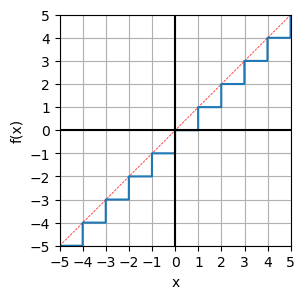

In [242]:
# 向下取整函数
x_array = np.linspace(-5, 5, 1001)
f_array = np.floor(x_array)
visualize_fx(x_array, f_array, '向下取整函数', step=True)

##### 向上取整函数 Ceil function

$$f(x) = \lceil x \rceil$$

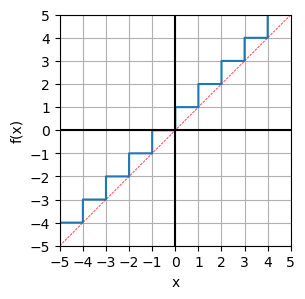

In [245]:
# 向上取整函数
x_array = np.linspace(-5, 5, 1001)
f_array = np.ceil(x_array)
visualize_fx(x_array, f_array, '向上取整函数', True)

##### 符号函数 Sign function

$$f(x) = \text{sgn}(x)$$

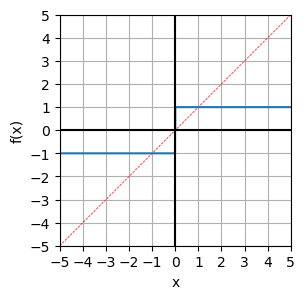

In [248]:
# 符号函数
x_array = np.linspace(-5, 5, 1001)
f_array = np.sign(x_array)
visualize_fx(x_array, f_array, '符号函数', True)

##### 指数函数 Exponential function

$$f(x) = \text{exp}(x) = e^x$$

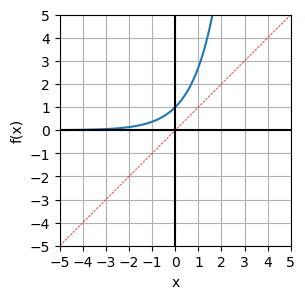

In [251]:
# 指数函数
x_array = np.linspace(-5, 5, 1001)
f_array = np.exp(x_array)
visualize_fx(x_array, f_array, '指数函数')

##### 对数函数 Logarithmic function

$$f(x) = \text{ln}(x)$$

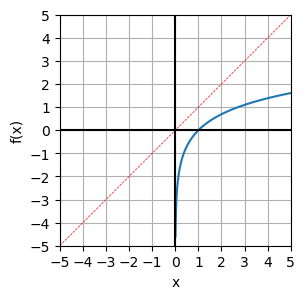

In [254]:
# 对数函数
x_array = np.linspace(-5, 5, 1001)
x_array_ = np.copy(x_array)
x_array_[x_array_<=0] = np.nan
f_array = np.log(x_array_)
visualize_fx(x_array, f_array, '对数函数')

### 参考阅读

关于广播原则，请参考:  
https://numpy.org/doc/stable/user/basics.broadcasting.html  
有关数学函数，请参考:  
https://numpy.org/doc/stable/reference/routines.math.html  
有关统计函数，请参考:  
https://numpy.org/doc/stable/reference/routines.statistics.html  
有关逻辑函数，请参考:  
https://numpy.org/doc/stable/reference/routines.logic.html  

In [258]:
# Repo: https://github.com/Visualize-ML
# Book 1 Python for Beginners  |  From Basic Arithmetic to Machine Learning
# Published and copyrighted by Tsinghua University Press
# Beijing, China, 2023